In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

In [3]:
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]])

In [4]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

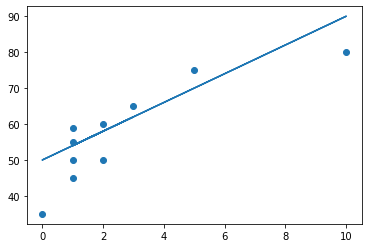

In [5]:
plt.scatter(X[1,:], y)
plt.plot(X[1,:], 50 + 4*X[1,:])

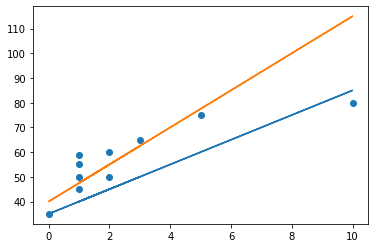

In [6]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)

In [7]:
y_pred1 = 35*np.ones(10) + X[1]*5
y_pred2 = 40*np.ones(10) + X[1]*7.5

In [8]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

In [9]:
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)

In [10]:
err1, err2

(9.4, -2.1)

In [11]:
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))

In [12]:
mae_1, mae_2

(10.4, 7.9)

In [13]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)

In [14]:
mse_1, mse_2

(143.6, 151.35)

Метод наименьших квадратов

In [15]:
X.shape

(2, 10)

In [16]:
X.T.shape

(10, 2)

In [17]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([47.23214286,  3.91071429])

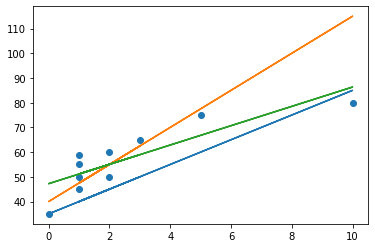

In [18]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)
plt.plot(X[1], W[0] + W[1] * X[1])

In [19]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [20]:
calc_mse(y, y_pred1)

143.6

In [21]:
def calc_mae(y, y_pred):
  err = np.mean(np.abs(y - y_pred))
  return err

In [22]:
calc_mae(y, y_pred1)

10.4

In [23]:
y_pred3 = W[0] + W[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [24]:
calc_mse(y, y_pred3)

45.93749999999999

In [25]:
calc_mae(y, y_pred3)

6.182142857142858

Градиентный спуск

In [26]:
n = 10
f = 1/n * np.sum((W[0] * X[0] - y)**2)

In [27]:
alpha = 1e-8
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [28]:
W[0] - g


47.232143060499986

#### Homework

1. Подберите скорость обучения (alpha) и количество итераций:

In [29]:
n = X.shape[1]
alpha = 1e-4
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.0001)

In [30]:
for i in range(1000):
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)
  for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
  if i % 100 == 0:
    print("Iter: {}, Weight: {}. MSE: {})".format(i, W, err))

Iter: 0, Weight: [1.01102 0.534  ]. MSE: 3173.15)
Iter: 100, Weight: [2.02168794 3.452835  ]. MSE: 2207.6942101483005)
Iter: 200, Weight: [2.88306663 5.58962851]. MSE: 1670.7027004086372)
Iter: 300, Weight: [3.63289519 7.14848061]. MSE: 1368.0832412796256)
Iter: 400, Weight: [4.29908617 8.28027926]. MSE: 1193.7493344933293)
Iter: 500, Weight: [4.90228732 9.09657298]. MSE: 1089.714750358689)
Iter: 600, Weight: [5.45777535 9.67982684]. MSE: 1024.2828984889416)
Iter: 700, Weight: [ 5.97685612 10.0910047 ]. MSE: 980.1260644155933)
Iter: 800, Weight: [ 6.46789973 10.37517467]. MSE: 947.770026039189)
Iter: 900, Weight: [ 6.93710574 10.56565326]. MSE: 922.0330206910179)


In [31]:
def grad_des(alpha, iters, W):
    """Gradient descent function""" 
    n = X.shape[1]
    err = 1000000
    for i in range(iters):
        y_pred = np.dot(W, X)
        err_n = calc_mse(y, y_pred)
        if err_n < err:
            err = err_n
            for j in range(W.shape[0]):
                W[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y))) 
        else:
            return i-1, W, err
    return i, W, err

In [32]:
err_min = 1000000
coef_min = []

for alpha in (5*1e-2, 1e-2, 5*1e-3, 1e-3):
    for iters in (1e2, 1e3, 1e4, 1e5):
        W = np.array([1, 0.5])
        n, wi, err = grad_des(alpha, int(iters), W)
        print('Alpha: {}, Iter: {}, Error: {}'.format(alpha, iters, err))
        if err < err_min:
            err_min = err
            coef_min = [alpha, iters]
print("Minimal error is {}, when coefficient is {}".format(err_min, coef_min))

Alpha: 0.05, Iter: 100.0, Error: 45.964314596488876
Alpha: 0.05, Iter: 1000.0, Error: 45.937500000000114
Alpha: 0.05, Iter: 10000.0, Error: 45.937500000000114
Alpha: 0.05, Iter: 100000.0, Error: 45.937500000000114
Alpha: 0.01, Iter: 100.0, Error: 177.92494760058068
Alpha: 0.01, Iter: 1000.0, Error: 45.937500890645076
Alpha: 0.01, Iter: 10000.0, Error: 45.93750000000112
Alpha: 0.01, Iter: 100000.0, Error: 45.93750000000112
Alpha: 0.005, Iter: 100.0, Error: 418.41707209650224
Alpha: 0.005, Iter: 1000.0, Error: 45.96885911973595
Alpha: 0.005, Iter: 10000.0, Error: 45.937500000002316
Alpha: 0.005, Iter: 100000.0, Error: 45.937500000002316
Alpha: 0.001, Iter: 100.0, Error: 901.6552358714531
Alpha: 0.001, Iter: 1000.0, Error: 176.7399358190342
Alpha: 0.001, Iter: 10000.0, Error: 45.93750096407864
Alpha: 0.001, Iter: 100000.0, Error: 45.93750000001437
Minimal error is 45.937500000000114, when coefficient is [0.05, 1000.0]


*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [33]:
for i in range(1000):
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)
  '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
  W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
  if i % 100 == 0:
    print(i, W, err)

0 [47.23213769  3.91071524] 45.93750000001437
100 [47.23213769  3.91071524] 45.937500000014346
200 [47.23213769  3.91071524] 45.93750000001437
300 [47.23213769  3.91071524] 45.93750000001437
400 [47.23213769  3.91071524] 45.93750000001434
500 [47.23213769  3.91071524] 45.93750000001434
600 [47.23213769  3.91071524] 45.93750000001435
700 [47.23213769  3.91071524] 45.93750000001434
800 [47.23213769  3.91071524] 45.93750000001436
900 [47.23213769  3.91071524] 45.93750000001433


In [34]:
n = X.shape[1]
alpha = 1e-4
W = np.array([1, 0.5])
W, alpha

e = 0.001
last_err = None

for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y)))
    
    if last_err == None:
        last_err = err
        continue

    elif i % 100 == 0:
        print('Iter: {}, Weight: {}, Error: {}'.format(i, W, err))
    
    elif last_err - err <= e:
        print('Iters: {}, Weight: {}, Error on this iter: {},  Obs_error: {}'.format(i, W, err, e))
        break

    last_err = err

Iter: 100, Weight: [4.71884428 4.21884428], Error: 1795.372786768742
Iter: 200, Weight: [7.1402917 6.6402917], Error: 1196.8339637692059
Iter: 300, Weight: [8.73628737 8.23628737], Error: 936.8146230533869
Iter: 400, Weight: [9.78822107 9.28822107], Error: 823.8561064989115
Iter: 500, Weight: [10.48155912  9.98155912], Error: 774.7842704306371
Iter: 600, Weight: [10.93854386 10.43854386], Error: 753.4663108064917
Iter: 700, Weight: [11.23974622 10.73974622], Error: 744.2052878053473
Iter: 800, Weight: [11.43827114 10.93827114], Error: 740.1820816195831
Iter: 900, Weight: [11.56912052 11.06912052], Error: 738.4343062376228


#### Задание *3: вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [35]:
err_min = 1e9
err = 1e6
delta = 1e-5
i = 0
while err_min - err > delta:
    y_pred = np.dot(W, X)
    err, err_min = calc_mse(y, y_pred), err
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)))
    i += 1
print('Iter: {}, Weight: {}, Error: {}'.format(i, W, err))

Iter: 45992, Weight: [46.93314367  3.96592677], Error: 45.98557328331509
